In [1]:
# Model Training and Evaluation
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("="*50)
print("LOADING DATA")
print("="*50)

train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

X_train = train_df['text']
y_train = train_df['label']
X_val = val_df['text']
y_val = val_df['label']
X_test = test_df['text']
y_test = test_df['label']

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

LOADING DATA
Training samples: 34707
Validation samples: 7437
Test samples: 7438


In [3]:
# Feature Extraction
print("\n" + "="*50)
print("FEATURE EXTRACTION")
print("="*50)

# TF-IDF Vectorization
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")

# Save vectorizer
with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print("✓ TF-IDF vectorizer saved")


FEATURE EXTRACTION
Creating TF-IDF features...
TF-IDF feature shape: (34707, 5000)
✓ TF-IDF vectorizer saved


In [4]:
# Model Training
print("\n" + "="*50)
print("TRAINING MODELS")
print("="*50)

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM': LinearSVC(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train
    model.fit(X_train_tfidf, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")


TRAINING MODELS

Training Naive Bayes...
  Accuracy:  0.8577
  Precision: 0.8460
  Recall:    0.8759
  F1 Score:  0.8607

Training Logistic Regression...
  Accuracy:  0.8856
  Precision: 0.8752
  Recall:    0.9003
  F1 Score:  0.8876

Training Linear SVM...


c:\Users\abdelali.baaddi\AppData\Local\anaconda3\envs\nlp_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


  Accuracy:  0.8772
  Precision: 0.8718
  Recall:    0.8856
  F1 Score:  0.8786

Training Random Forest...
  Accuracy:  0.8463
  Precision: 0.8464
  Recall:    0.8475
  F1 Score:  0.8470


In [5]:
# Compare models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1 Score': [results[m]['f1'] for m in results.keys()]
})

print(comparison_df.to_string(index=False))


MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1 Score
        Naive Bayes  0.857738   0.846014 0.875938  0.860716
Logistic Regression  0.885572   0.875228 0.900322  0.887597
         Linear SVM  0.877235   0.871802 0.885584  0.878639
      Random Forest  0.846309   0.846401 0.847535  0.846967


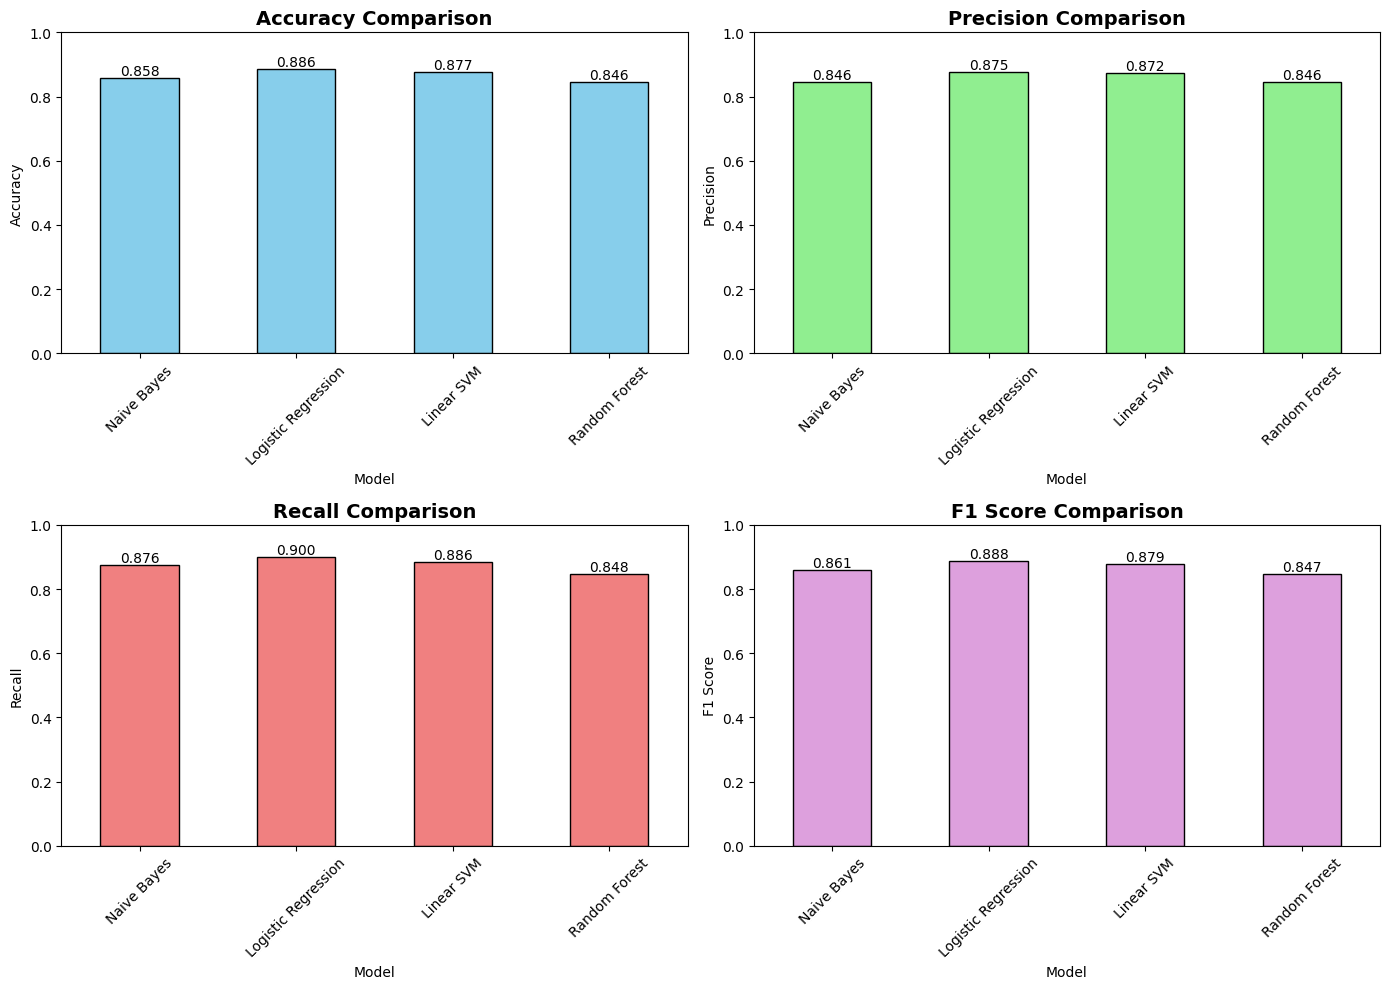

In [6]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'plum']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, 
                       color=color, legend=False, edgecolor='black')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.savefig('../data/processed/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Select best model
best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']

print("\n" + "="*50)
print(f"BEST MODEL: {best_model_name}")
print("="*50)


BEST MODEL: Logistic Regression


In [8]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test_tfidf)

print("\nTest Set Performance:")
print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1 Score:  {f1_score(y_test, y_test_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Negative', 'Positive']))


Test Set Performance:
  Accuracy:  0.8860
  Precision: 0.8756
  Recall:    0.9009
  F1 Score:  0.8880

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      3705
    Positive       0.88      0.90      0.89      3733

    accuracy                           0.89      7438
   macro avg       0.89      0.89      0.89      7438
weighted avg       0.89      0.89      0.89      7438



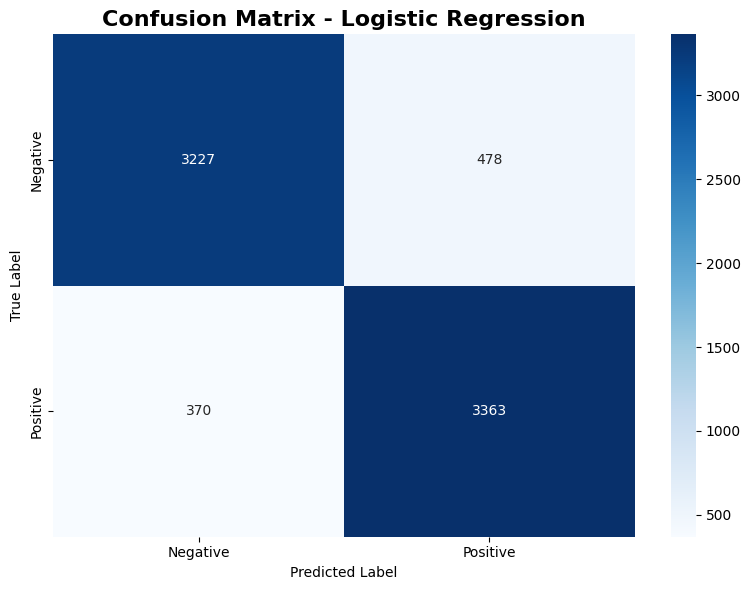

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('../data/processed/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Save best model
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\n✓ Best model ({best_model_name}) saved to '../models/best_model.pkl'")


✓ Best model (Logistic Regression) saved to '../models/best_model.pkl'


In [11]:
# Save all models
for name, result in results.items():
    filename = f"../models/{name.lower().replace(' ', '_')}_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(result['model'], f)

print("✓ All models saved")

✓ All models saved


In [12]:
# Save results
with open('../models/model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("✓ Model results saved")

print("\n" + "="*50)
print("MODELING COMPLETE")
print("="*50)

✓ Model results saved

MODELING COMPLETE
